In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Real_Estate.csv.xls")
df1 = df[['House_age', 'House_price_of_unit_area']]
df1.head()

,House_age,House_price_of_unit_area
0,13.3,6.488673
1,35.5,24.970725
2,1.1,26.694267
3,22.2,38.091638
4,8.5,21.654710


In [49]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df[['House_age']].values, df.House_price_of_unit_area.values)

LinearRegression()

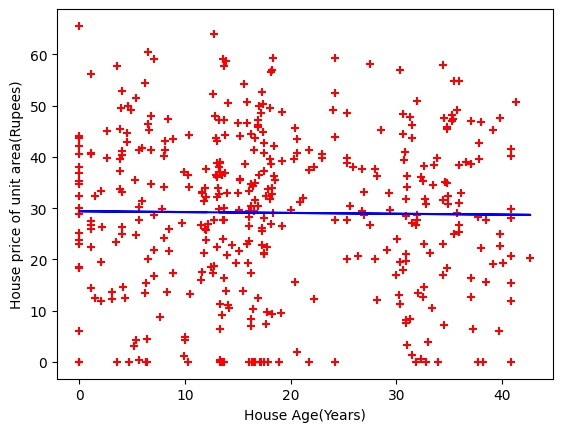

In [54]:
plt.xlabel('House Age(Years)')
plt.ylabel('House price of unit area(Rupees)')
plt.scatter(df.House_age.values, df.House_price_of_unit_area.values, color = 'red', marker = '+')
plt.plot(df.House_age.values, reg.predict(df[['House_age']].values), color = 'blue')

In [58]:
reg1 = reg.predict([[100], [54], [46], [76], [87], [23], [33], [12]])
print(reg1)
print(reg.coef_)
print(reg.intercept_)
print(-0.01645616 * 54 + 29.405025436103212)
df2 = pd.DataFrame({"Age": [100, 54, 46, 76, 87, 23, 33, 12]})
df2["Prices"] = reg1
df2

[27.75940944 28.5163928  28.64804208 28.15435728 27.97333952 29.02653376
 28.86197216 29.20755152]
[-0.01645616]
29.405025436103212
28.51639279610321


,Age,Prices
0,100,27.759409
1,54,28.516393
2,46,28.648042
3,76,28.154357
4,87,27.973340
5,23,29.026534
6,33,28.861972
7,12,29.207552
